In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv("drive/My Drive/JS_newIndicators.csv", index_col= "DateTime")
data.index = pd.to_datetime(data.index)
data = data.drop("pricediff", axis=1)

In [0]:
df = data#data["2019"]
#df = df[:375]

In [0]:
peekidx,_ = find_peaks(df.close.values, prominence = 1.5)#, distance = 5 )
troughidx,_ = find_peaks( - df.close.values, prominence = 1.5)#, distance = 5 )

In [0]:
pk = []
tr = []
pt = []
for i in range(0,len(df)):
  if(i in peekidx):
    pt.append(1)
    pk.append(1)
    tr.append(np.nan)
  elif(i in troughidx):
    pt.append(-1)
    tr.append(1)
    pk.append(np.nan)
  else:
    pt.append(0)
    tr.append(np.nan)
    pk.append(np.nan)

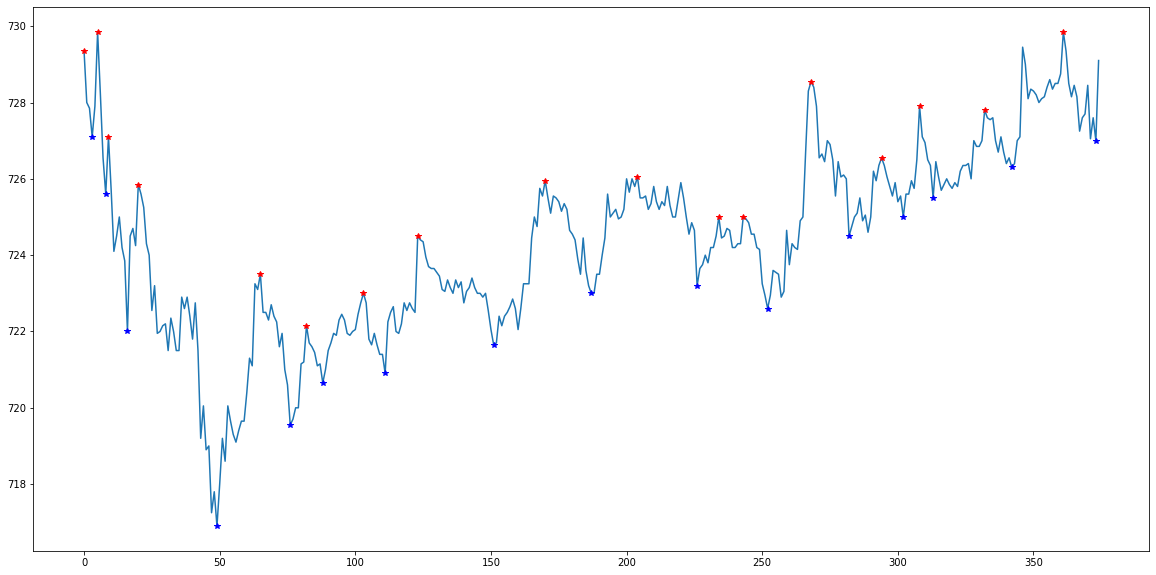

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df.close.values[-375:])
plt.plot((pk*df.close.values)[-375:],"r*",)
plt.plot((tr*df.close.values)[-375:],"b*")

In [0]:
df["peaks"] = pt

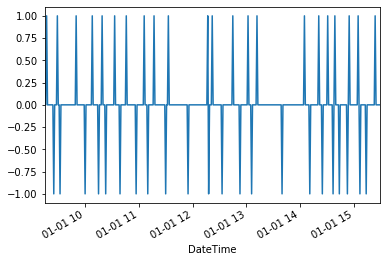

In [0]:
df.peaks.plot()

In [0]:
df.to_csv("JS_peaks1_5.csv")